## Contextualizing the Problem

Data mining is an essential practice for uncovering patterns and insights from extensive datasets, enabling businesses to make informed, data-driven decisions. This approach is especially valuable in marketing, where understanding customer behavior can lead to more targeted campaigns and optimized resource allocation. This project aims to apply data mining to the marketing domain, specifically focusing on a sample dataset provided by a food retail company that offers various product categories through multiple sales channels. The primary objective is to develop a predictive model to maximize the efficiency and profitability of marketing campaigns.

The dataset at hand is derived from a pilot marketing campaign conducted by the company, involving 2,240 randomly selected customers. This pilot aimed to test the effectiveness of a marketing initiative promoting a new gadget, with results recorded as customer responses (purchases or non-purchases). Despite generating revenue from respondents, the overall campaign ran at a loss, with a negative profit of -3,046 monetary units (MU). This underscores the importance of leveraging data mining to predict and target likely respondents more accurately.

## Problem Statement

**Given the data from a sample marketing campaign, how can we accurately predict which customers are most likely to respond to future campaigns, and what insights can we derive to improve marketing strategies and profitability?**

## Business Objectives and Value Proposition (Business Understanding)

The main goal is to build a robust predictive model that can identify customers most likely to respond to future campaigns. This will enable the marketing team to strategically target high-potential customers, enhancing campaign efficiency and profitability. Achieving this goal involves understanding the characteristics of past respondents and using this insight to refine future efforts. The success of this initiative is expected to justify the value of data-driven marketing strategies and contribute to sustained revenue growth.

Key business objectives include:

- Increasing Campaign Profitability: By accurately predicting respondents, the company can focus its marketing efforts on customers who are more likely to engage, minimizing costs and maximizing revenue.

- Customer Insight and Segmentation: Gaining a deeper understanding of customer behaviors and attributes that correlate with positive responses to marketing campaigns.

- Strategic Resource Allocation: Enabling the marketing team to allocate budget and resources more effectively.

## Data Mining Methodology: CRISP-DM Approach

To ensure a systematic and effective analysis, we will adopt the CRISP-DM (Cross-Industry Standard Process for Data Mining) framework. This method structures the project into six key phases:
<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/639px-CRISP-DM_Process_Diagram.png" alt="CRISP-DM Process" style="width:400px;height:400px;margin-top: 20px;">
</div>

1. Business Understanding: Define the project’s goals and success criteria, focusing on predicting customer responses and maximizing campaign profit. The aim is to ensure targeted marketing that improves the return on investment (ROI).

2.	Data Understanding: Explore the dataset, which includes socio-demographic and firmographic information about customers and their responses to the pilot campaign. This step will involve analyzing data distributions, correlations, and initial insights into what differentiates respondents from non-respondents.

3.	Data Preparation: Prepare the dataset for modeling by handling missing values, outliers, and data transformations. Categorical variables will be encoded, and numerical features will be scaled to enhance model performance. This phase also includes creating new features if necessary to capture additional insights (e.g., interaction terms between relevant variables).

4.	Modeling: Develop multiple predictive models, such as logistic regression, decision tree-based models, and ensemble methods (e.g., Random Forest). Train these models using a split of the data into training and test sets, followed by cross-validation and hyperparameter tuning for optimization.

5.	Evaluation: Assess the models based on key performance metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC. The goal is to select the best-performing model that aligns with the business objectives. Additionally, analyze potential biases or limitations in the model’s performance.

6.	Deployment: While deployment is beyond the scope of this initial analysis, successful implementation could lead to integrating the predictive model into the company’s marketing platform for real-time targeting and campaign management.

# ABOVE TEXT IS GOAT GENERATED WE NEED TO READ THROUGH IT AND MAKE SURE IT IS GOOD !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Importing modules

In [100]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Data Understanding

In [101]:
# First create the folder "data" and add the data source into it
def check_data_folder_dataset_load_df(dataset_csv_name="marketing_campaign.csv"):
    if not os.path.isdir("data"):
        raise Exception("there is no data folder ")
    if not os.path.exists(f"data/{dataset_csv_name}"):
        raise Exception(f"there is no {dataset_csv_name} in the data folder ")
    
    print("data is correctly stored in data folder")
    print("return the pandas dataframe")
    return pd.read_csv(f"data/{dataset_csv_name}", delimiter=";")
    
pd.set_option('display.max_columns', None)        
df_marketing = check_data_folder_dataset_load_df()
df_marketing

data is correctly stored in data folder
return the pandas dataframe


ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2012-09-04       58       635         88              546   
1            1  2014-03-08       38        11          1                6   
2            0  2013-08-21       26       426         49              127   
3            0  2014-02-10       26        11          4               20   
4            0  2014-01-19       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  2013-06-13       46       709         43              182   
2236         1  2014-06-10       56       406          0               30   
2237         0  2014-01-25       91       908         48              217   
2238         1  2014-01-24        8       428         30              214   
2239         1  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

In [102]:
df_marketing.columns



Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

The dataset contains 29 columns and 2240 rows. The column descriptions can be found below:

1.	AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
2.	AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
3.	AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
4.	AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
5.	AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
6.	Complain - 1 if customer complained in the last 2 years
7.	Dt_Customer - date of customer’s enrolment with the company
8.	Education - customer’s level of education
9.	ID - Customer’s id
10.	Income - customer’s yearly household income
11.	Kidhome - number of small children in customer’s household
12.	Marital_Status - customer’s marital status
13.	MntFishProducts - amount spent on fish products in the last 2 years
14.	MntFruits - amount spent on fruits products in the last 2 years
15.	MntGoldProds - amount spent on gold products in the last 2 years
16.	MntMeatProducts - amount spent on meat products in the last 2 years
17.	MntSweetProducts - amount spent on sweet products in the last 2 years
18.	MntWines - amount spent on wine products in the last 2 years
19.	NumCatalogPurchases - number of purchases made using catalogue
20.	NumDealsPurchases - number of purchases made with discount
21.	NumStorePurchases - number of purchases made directly in stores
22.	NumWebPurchases - number of purchases made through company’s web site
23.	NumWebVisitsMonth - number of visits to company’s web site in the last month
24.	Recency - number of days since the last purchase
25.	Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
26.	Teenhome - number of teenagers in customer’s household
27.	Year_Birth - Customer’s year of birth
28.	Z_CostContact - Cost to contact a customer
29.	Z_Revenue - Revenue after client accepting campaign

Below we can see that we have no missing values in the dataset, except for the column Income we see that there are 24 rows that have missing values. 

In [103]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

As we can see there is indeed 24 rows in the Income column with Null values:

In [104]:
print("Missing data in the dataframe:")
print(df_marketing.isnull().sum())

Missing data in the dataframe:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


Since 1% of the columns have Null values in them, we can safely remove them:

In [105]:
df_marketing = df_marketing.dropna()

In [106]:
df_marketing.describe().transpose().round(2)

count      mean       std     min       25%      50%  \
ID                   2216.0   5588.35   3249.38     0.0   2814.75   5458.5   
Year_Birth           2216.0   1968.82     11.99  1893.0   1959.00   1970.0   
Income               2216.0  52247.25  25173.08  1730.0  35303.00  51381.5   
Kidhome              2216.0      0.44      0.54     0.0      0.00      0.0   
Teenhome             2216.0      0.51      0.54     0.0      0.00      0.0   
Recency              2216.0     49.01     28.95     0.0     24.00     49.0   
MntWines             2216.0    305.09    337.33     0.0     24.00    174.5   
MntFruits            2216.0     26.36     39.79     0.0      2.00      8.0   
MntMeatProducts      2216.0    167.00    224.28     0.0     16.00     68.0   
MntFishProducts      2216.0     37.64     54.75     0.0      3.00     12.0   
MntSweetProducts     2216.0     27.03     41.07     0.0      1.00      8.0   
MntGoldProds         2216.0     43.97     51.82     0.0      9.00     24.5   
NumDealsPurchases    2216.0      2.32      1.92     0.0      1.00      2.0   
NumWebPurchases      2216.0      4.09      2.74     0.0      2.00      4.0   
NumCatalogPurchases  2216.0      2.67      2.93     0.0      0.00      2.0   
NumStorePurchases    2216.0      5.80      3.25     0.0      3.00      5.0   
NumWebVisitsMonth    2216.0      5.32      2.43     0.0      3.00      6.0   
AcceptedCmp3         2216.0      0.07      0.26     0.0      0.00      0.0   
AcceptedCmp4         2216.0      0.07      0.26     0.0      0.00      0.0   
AcceptedCmp5         2216.0      0.07      0.26     0.0      0.00      0.0   
AcceptedCmp1         2216.0      0.06      0.24     0.0      0.00      0.0   
AcceptedCmp2         2216.0      0.01      0.12     0.0      0.00      0.0   
Complain             2216.0      0.01      0.10     0.0      0.00      0.0   
Z_CostContact        2216.0      3.00      0.00     3.0      3.00      3.0   
Z_Revenue            2216.0     11.00      0.00    11.0     11.00     11.0   
Response             2216.0      0.15      0.36     0.0      0.00      0.0   

                          75%       max  
ID                    8421.75   11191.0  
Year_Birth            1977.00    1996.0  
Income               68522.00  666666.0  
Kidhome                  1.00       2.0  
Teenhome                 1.00       2.0  
Recency                 74.00      99.0  
MntWines               505.00    1493.0  
MntFruits               33.00     199.0  
MntMeatProducts        232.25    1725.0  
MntFishProducts         50.00     259.0  
MntSweetProducts        33.00     262.0  
MntGoldProds            56.00     321.0  
NumDealsPurchases        3.00      15.0  
NumWebPurchases          6.00      27.0  
NumCatalogPurchases      4.00      28.0  
NumStorePurchases        8.00      13.0  
NumWebVisitsMonth        7.00      20.0  
AcceptedCmp3             0.00       1.0  
AcceptedCmp4             0.00       1.0  
AcceptedCmp5             0.00       1.0  
AcceptedCmp1             0.00       1.0  
AcceptedCmp2             0.00       1.0  
Complain                 0.00       1.0  
Z_CostContact            3.00       3.0  
Z_Revenue               11.00      11.0  
Response                 0.00       1.0

### Feature Engineering

Lets add some extra information based on the dataset. 

In [107]:
# Add a new column age to the dataset
df_marketing['Age'] = 2020 - df_marketing['Year_Birth']

# Add a new column to calculate the total amount spent by each customer for every product
df_marketing['Total_Spent'] = df_marketing['MntWines'] + df_marketing['MntFruits'] + df_marketing['MntMeatProducts'] + df_marketing['MntFishProducts'] + df_marketing['MntSweetProducts'] + df_marketing['MntGoldProds']

# Add a new column to calculate the total purchases made by each customer
df_marketing['Total_Purchase'] = df_marketing['NumDealsPurchases'] + df_marketing['NumWebPurchases'] + df_marketing['NumCatalogPurchases'] + df_marketing['NumStorePurchases']

# Add a new column to calculate the total number of campaign responses made by each customer
df_marketing['Total_Responses'] =  df_marketing['AcceptedCmp1'] + df_marketing['AcceptedCmp2'] + df_marketing['AcceptedCmp3'] + df_marketing['AcceptedCmp4'] + df_marketing['AcceptedCmp5']

# Add a new column to check if the customer is a parent or not as a boolean
df_marketing['Is_Parent'] = (df_marketing['Kidhome'] > 0) | (df_marketing['Teenhome'] > 0)

# Add a new column to split the marital status 
couple_status_mapping = {
    'Married': 'Couple',
    'Together': 'Couple',
    'Single': 'Single',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
}
df_marketing['Is_Couple'] = df_marketing['Marital_Status'].map(couple_status_mapping)

df_marketing

/var/folders/tr/zpvfmrm92wb7phcgl0ryyw600000gn/T/ipykernel_62071/2974905994.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/tr/zpvfmrm92wb7phcgl0ryyw600000gn/T/ipykernel_62071/2974905994.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/tr/zpvfmrm92wb7phcgl0ryyw600000gn/T/ipykernel_62071/2974905994.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2012-09-04       58       635         88              546   
1            1  2014-03-08       38        11          1                6   
2            0  2013-08-21       26       426         49              127   
3            0  2014-02-10       26        11          4               20   
4            0  2014-01-19       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  2013-06-13       46       709         43              182   
2236         1  2014-06-10       56       406          0               30   
2237         0  2014-01-25       91       908         48              217   
2238         1  2014-01-24        8       428         30              214   
2239         1  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

### Pairplot

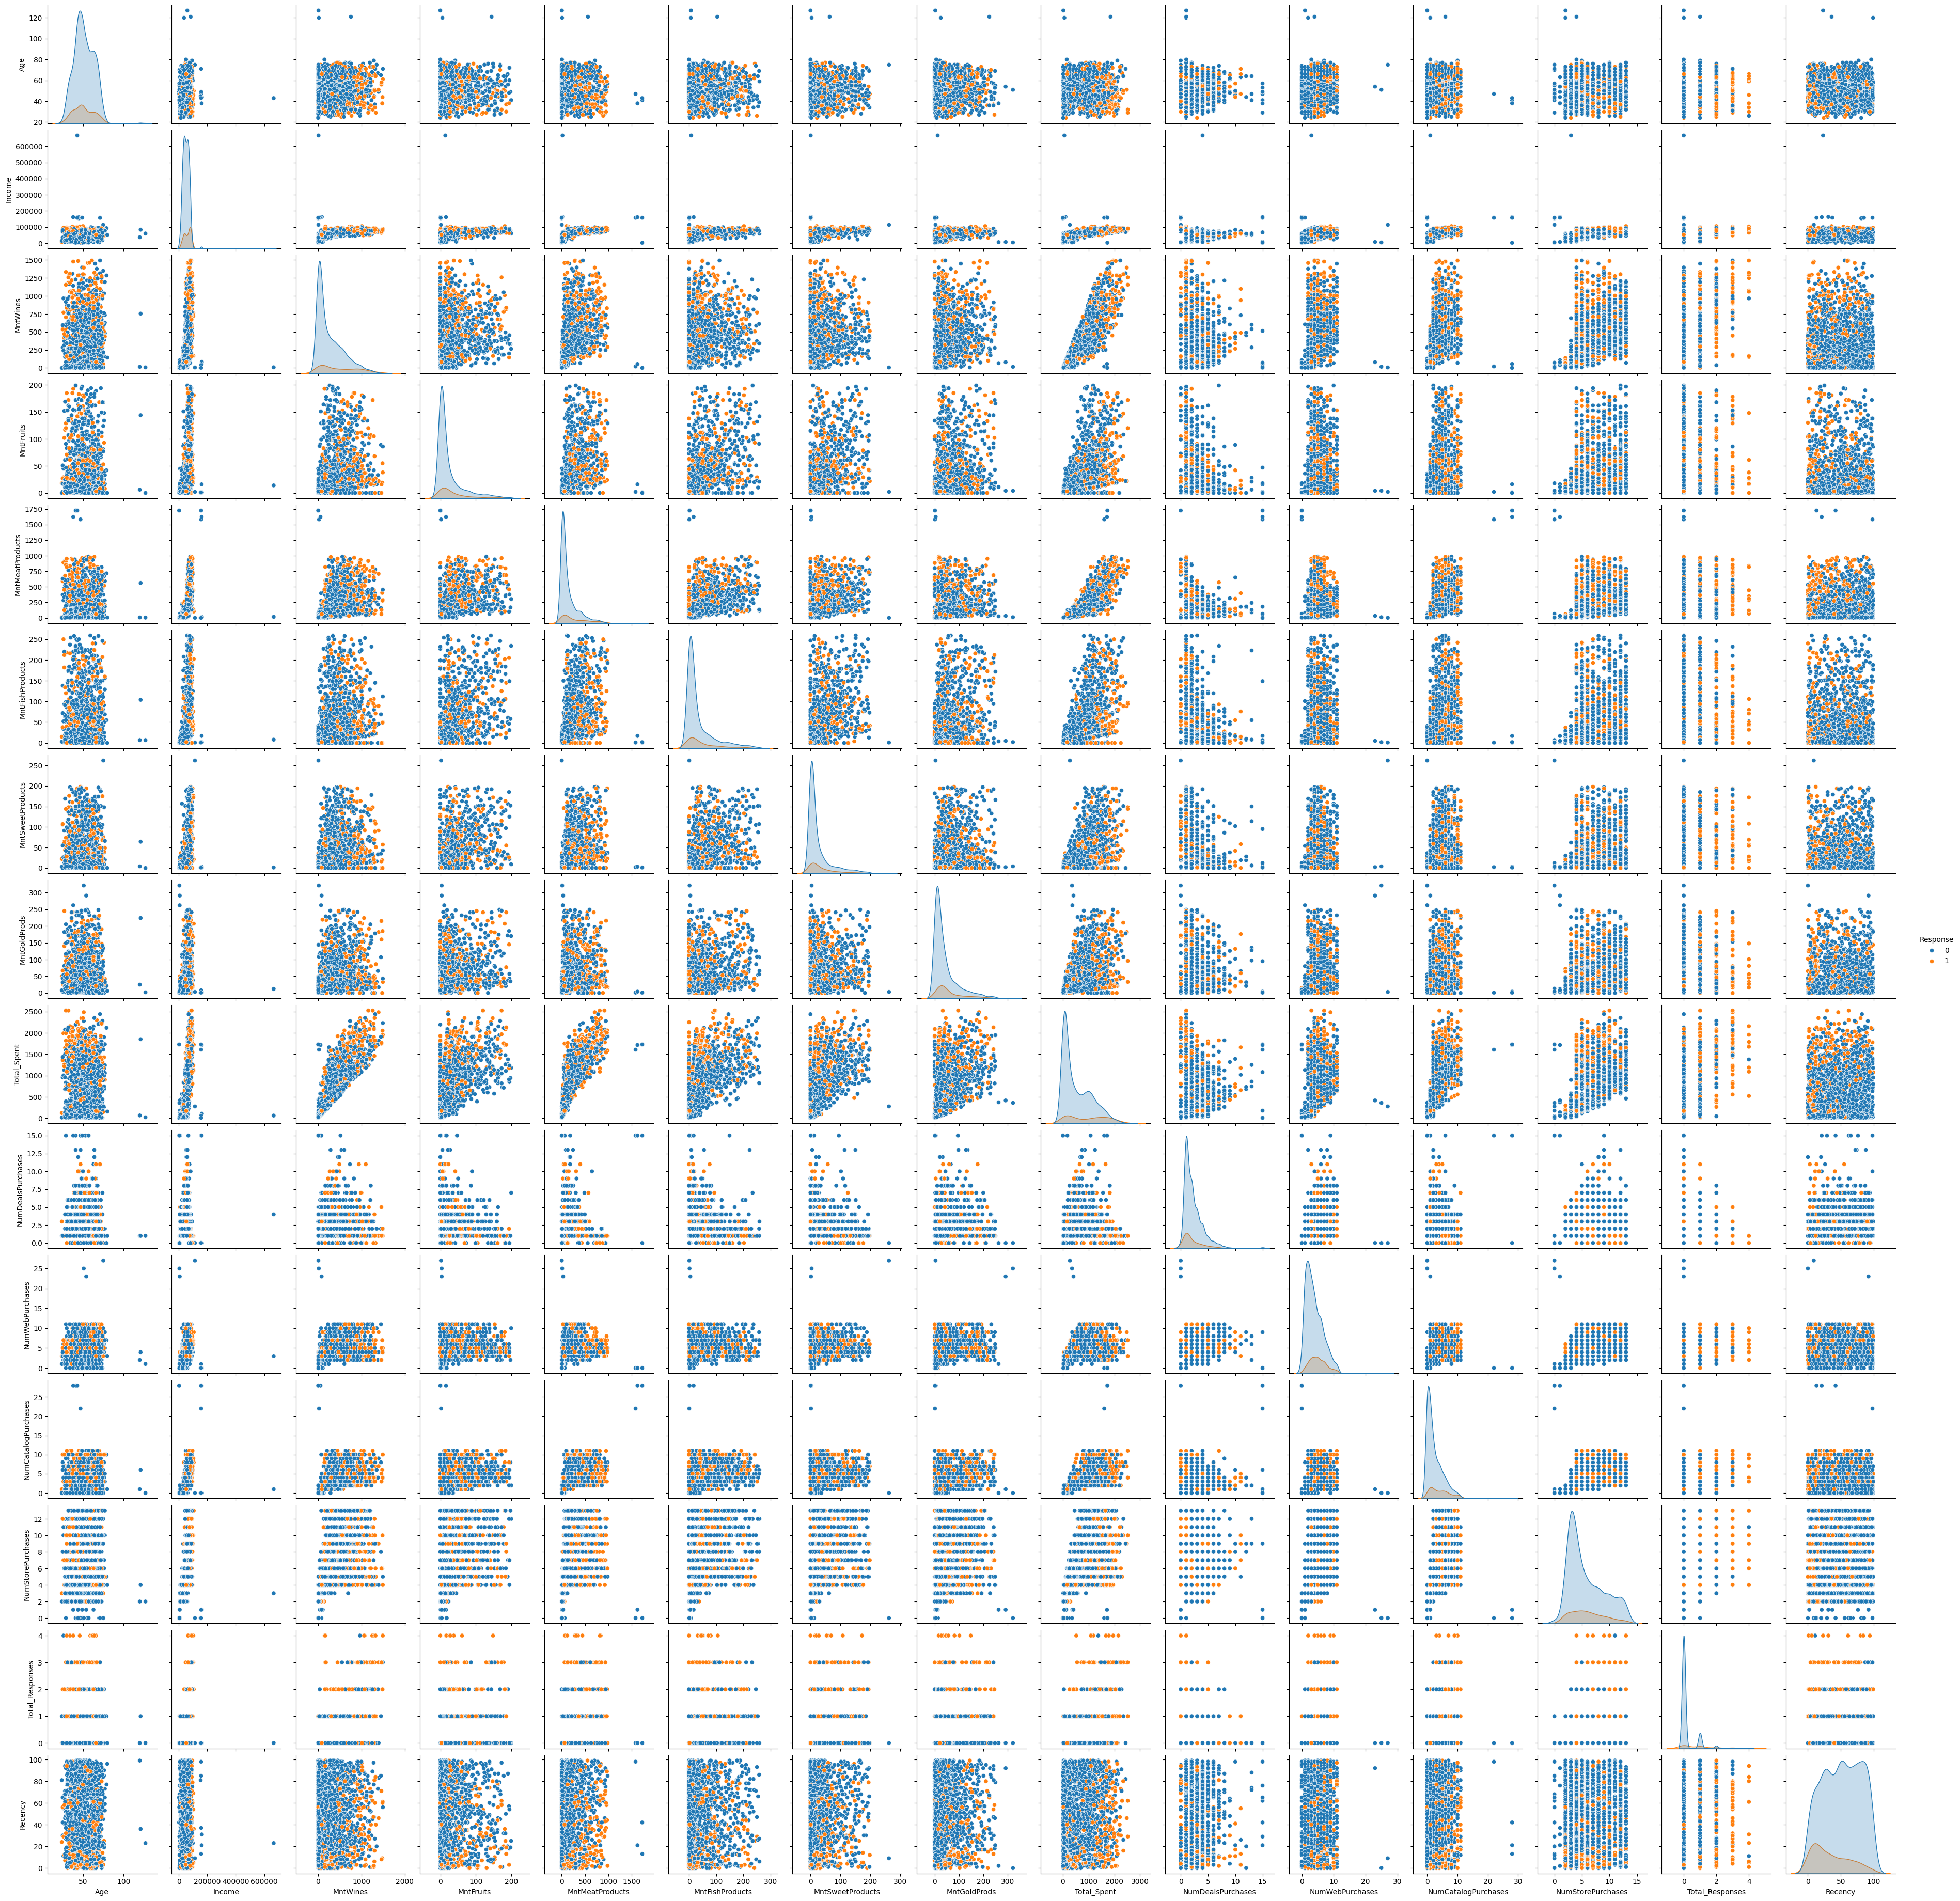

In [108]:
columns_of_interest = [
    'Age', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Spent', 
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
    'NumStorePurchases', 'Total_Responses', 'Response', 'Recency'
]

pairplot_df = df_marketing[columns_of_interest]

sns.pairplot(pairplot_df, hue='Response')

### Histogram

In [109]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

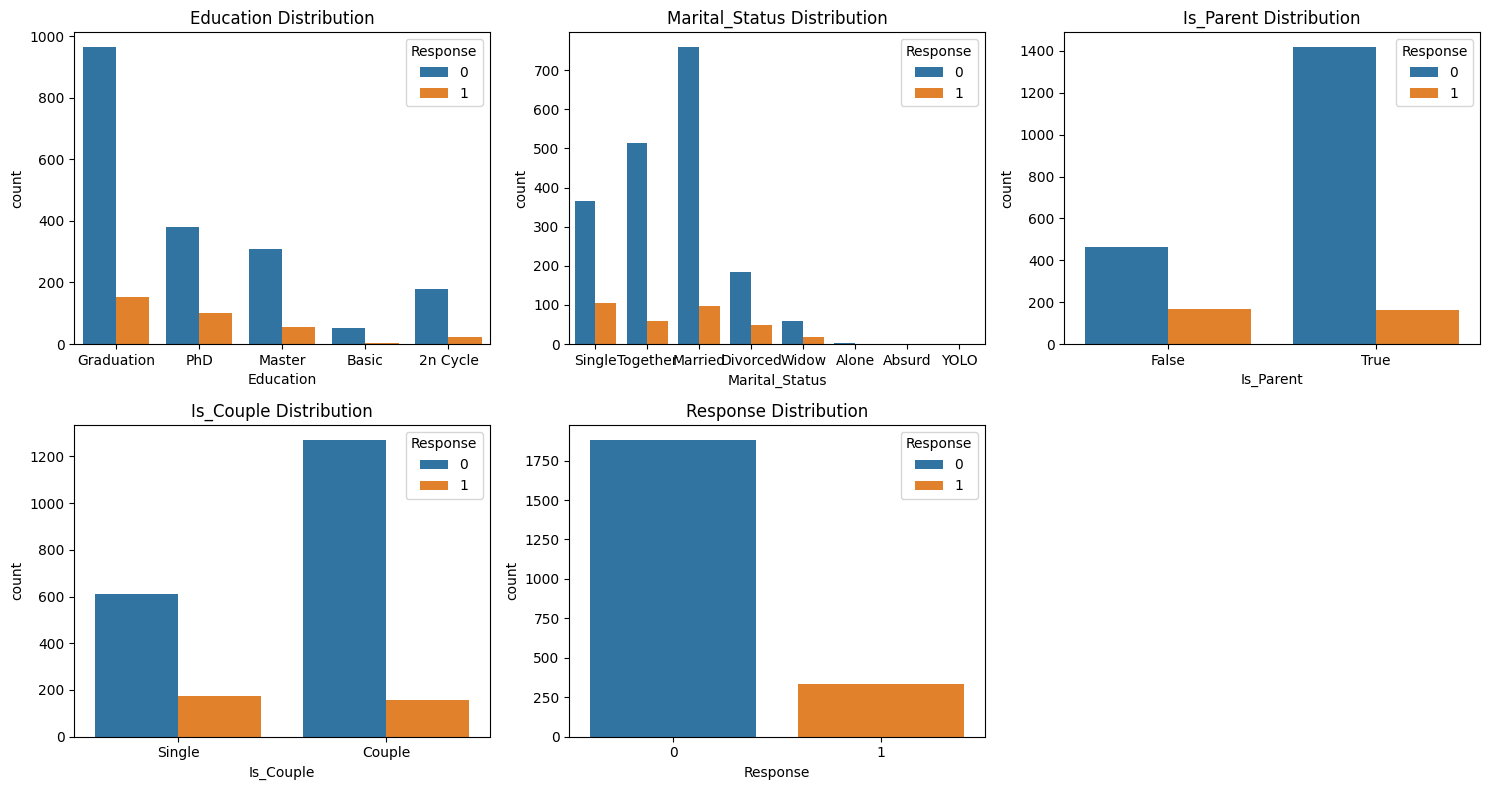

In [110]:
def create_histograms(df, columns, rows=1, cols=2):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 8))
    axes = axes.flatten()  # Flatten to easily index in a loop

    for i, column in enumerate(columns):
        sns.countplot(data=df, x=column, hue='Response', ax=axes[i])
        axes[i].set_title(f'{column} Distribution')

    # Remove any empty subplots if there are fewer columns than grid spaces
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Example usage
df_categorical_variables = df_marketing[['Education', 'Marital_Status', 'Is_Parent', 'Is_Couple', 'Response']]
create_histograms(df_categorical_variables, df_categorical_variables.columns, rows=2, cols=3)

### Checking Outliers

['Age', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Spent', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Total_Responses', 'Response', 'Recency']


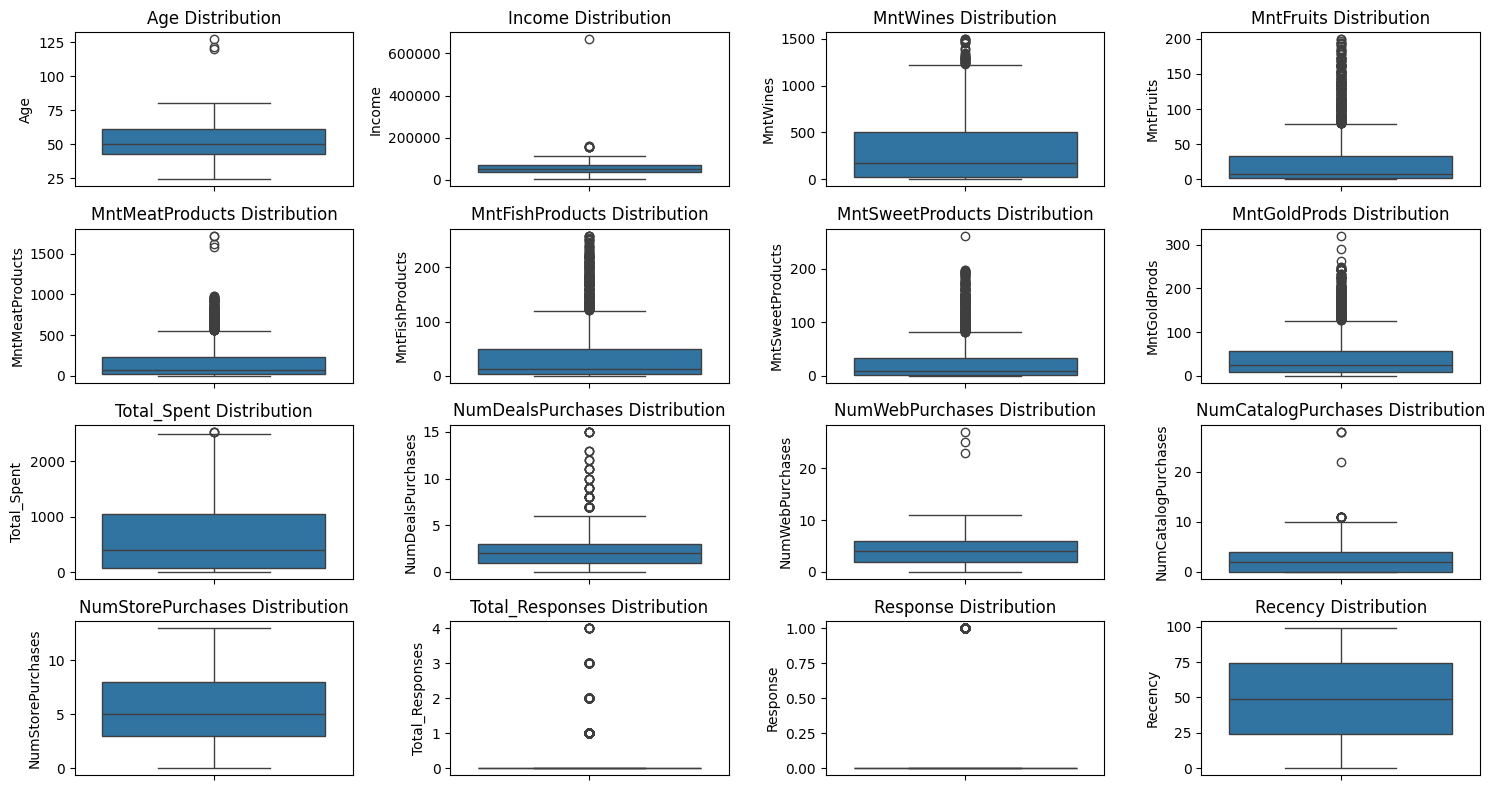

In [111]:
columns_of_interest_for_boxplot = columns_of_interest
print(columns_of_interest_for_boxplot)

def create_boxplots(df, columns, rows=1, cols=2):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 8))
    axes = axes.flatten()  # Flatten to easily index in a loop

    for i, column in enumerate(columns):
        sns.boxplot(data=df, y=column, ax=axes[i])
        axes[i].set_title(f'{column} Distribution')

    # Remove any empty subplots if there are fewer columns than grid spaces
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

create_boxplots(df_marketing, columns_of_interest_for_boxplot, rows=4, cols=4)